Task1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
customers = pd.read_csv('/kaggle/input/zeotap-assignment-dataset/Customers.csv')
products = pd.read_csv('/kaggle/input/zeotap-assignment-dataset/Products.csv')
transactions = pd.read_csv('/kaggle/input/zeotap-assignment-dataset/Transactions.csv')

In [3]:
print(customers.head(5))

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print(transactions.head(5))

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [5]:
print(products.head(5))

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [8]:
print(customers.isna().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [9]:
print(products.isna().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [10]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
products['Price'].fillna(products['Price'].mean(), inplace=True)
merged_df = pd.merge(transactions, products, on='ProductID', how='left')
merged_df = pd.merge(merged_df, customers, on='CustomerID', how='left')

<ipython-input-10-5b473f43a8f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['Price'].fillna(products['Price'].mean(), inplace=True)


In [16]:
print(customers.shape, products.shape, transactions.shape)
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

(200, 4) (100, 4) (1000, 7)
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [18]:
print(merged_df.head(10))
merged_df.to_csv('merged_df.csv')

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   
5        T00442      C0188      P067 2024-12-26 14:40:03         1   
6        T00490      C0195      P067 2024-11-24 11:49:48         3   
7        T00536      C0008      P067 2024-09-22 06:13:59         1   
8        T00564      C0157      P067 2024-12-07 17:57:40         3   
9        T00631      C0130      P067 2024-05-14 23:14:59         2   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronic

Distribution of Customers by Region

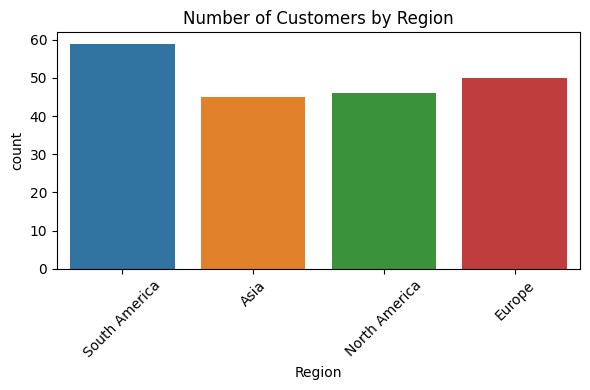

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='Region', data=customers)
plt.title('Number of Customers by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Monthly Sales Trend

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


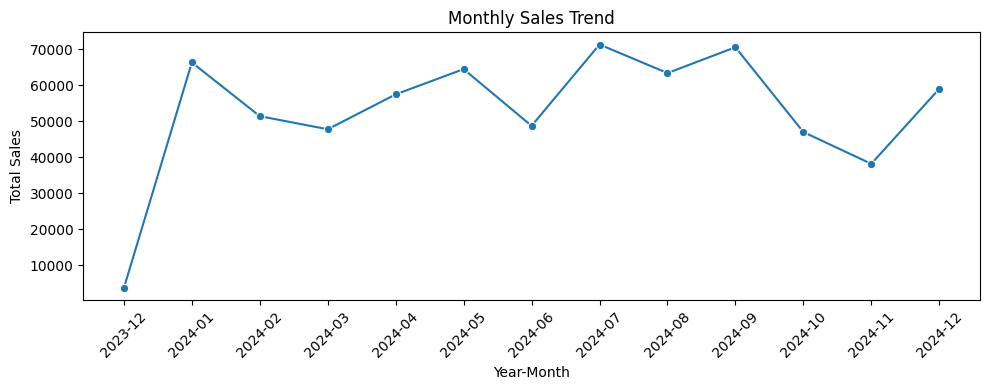

In [25]:
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M').astype(str)
sales_by_month = merged_df.groupby('YearMonth')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=sales_by_month, x='YearMonth', y='TotalValue', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total Sales by Category

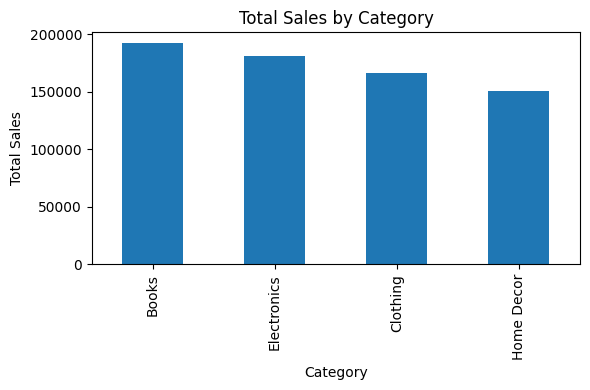

In [26]:
sales_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

Top 10 Products by Sales

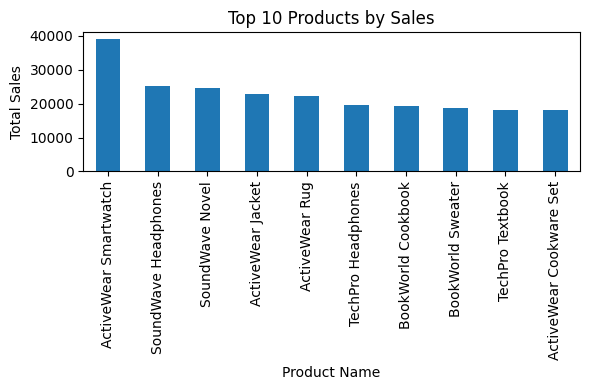

In [27]:
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

Customer Signups by Year

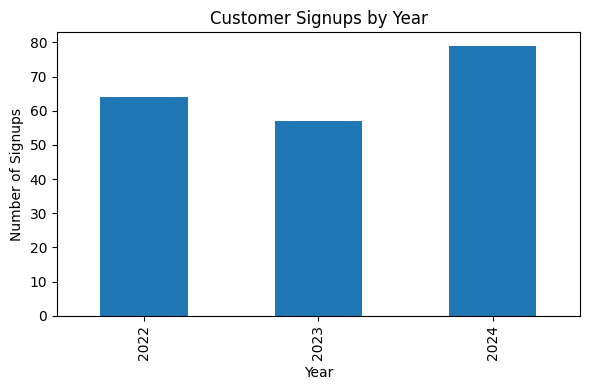

In [28]:
merged_df['SignupYear'] = merged_df['SignupDate'].dt.year
signups_by_year = customers.groupby(customers['SignupDate'].dt.year)['CustomerID'].count()
plt.figure(figsize=(6,4))
signups_by_year.plot(kind='bar')
plt.title('Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.tight_layout()
plt.show()

Total Revenue by Region

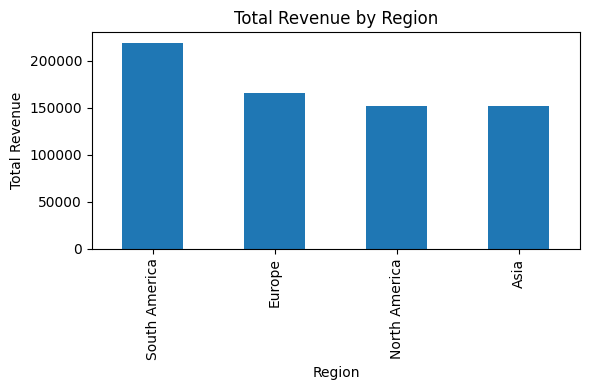

In [29]:
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
region_revenue.plot(kind='bar')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

In [30]:
top_spenders = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_spenders)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


Heatmap of Revenue by Region & Category

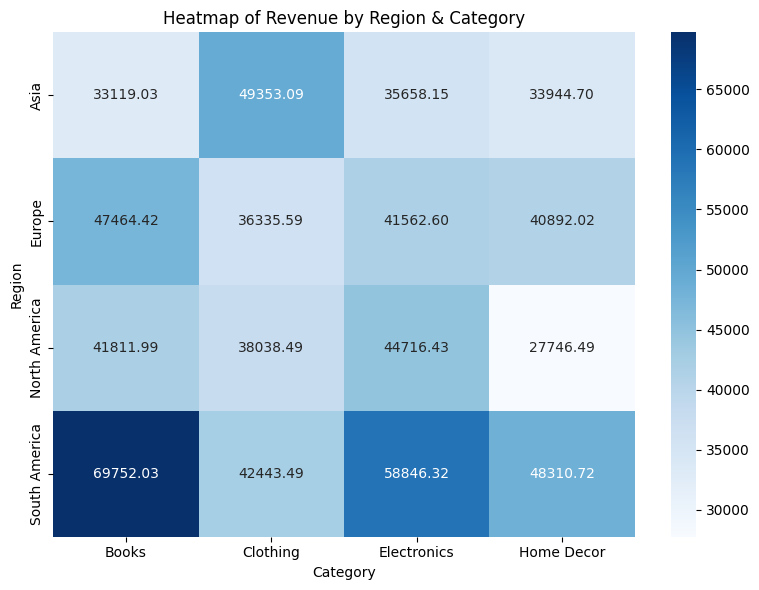

In [31]:
pivot_sales = merged_df.pivot_table(index='Region', columns='Category', values='TotalValue', aggfunc='sum').fillna(0)
plt.figure(figsize=(8,6))
sns.heatmap(pivot_sales, annot=True, fmt=".2f", cmap='Blues')
plt.title("Heatmap of Revenue by Region & Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

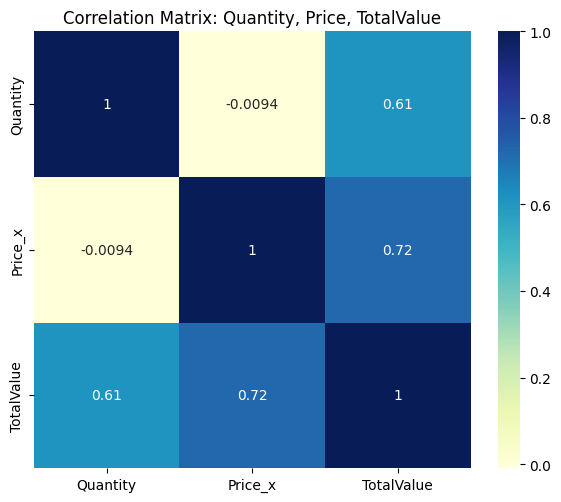

In [32]:
numeric_cols = ['Quantity','Price_x','TotalValue']
corr_matrix = merged_df[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Matrix: Quantity, Price, TotalValue")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

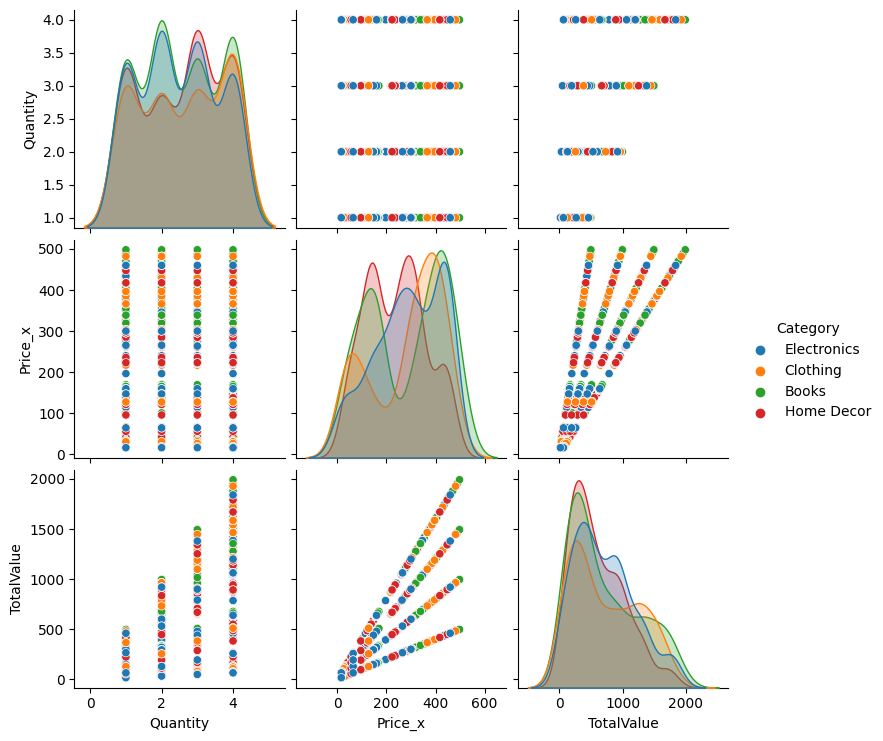

In [33]:
sns.pairplot(data=merged_df, vars=numeric_cols, hue='Category', diag_kind='kde')
plt.show()